# Import Libraries

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


## Library configurations

In [111]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [112]:
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


In [113]:
# import data with pandas
data = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [116]:
columns_name = data.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


# Explorartory Data Analysis

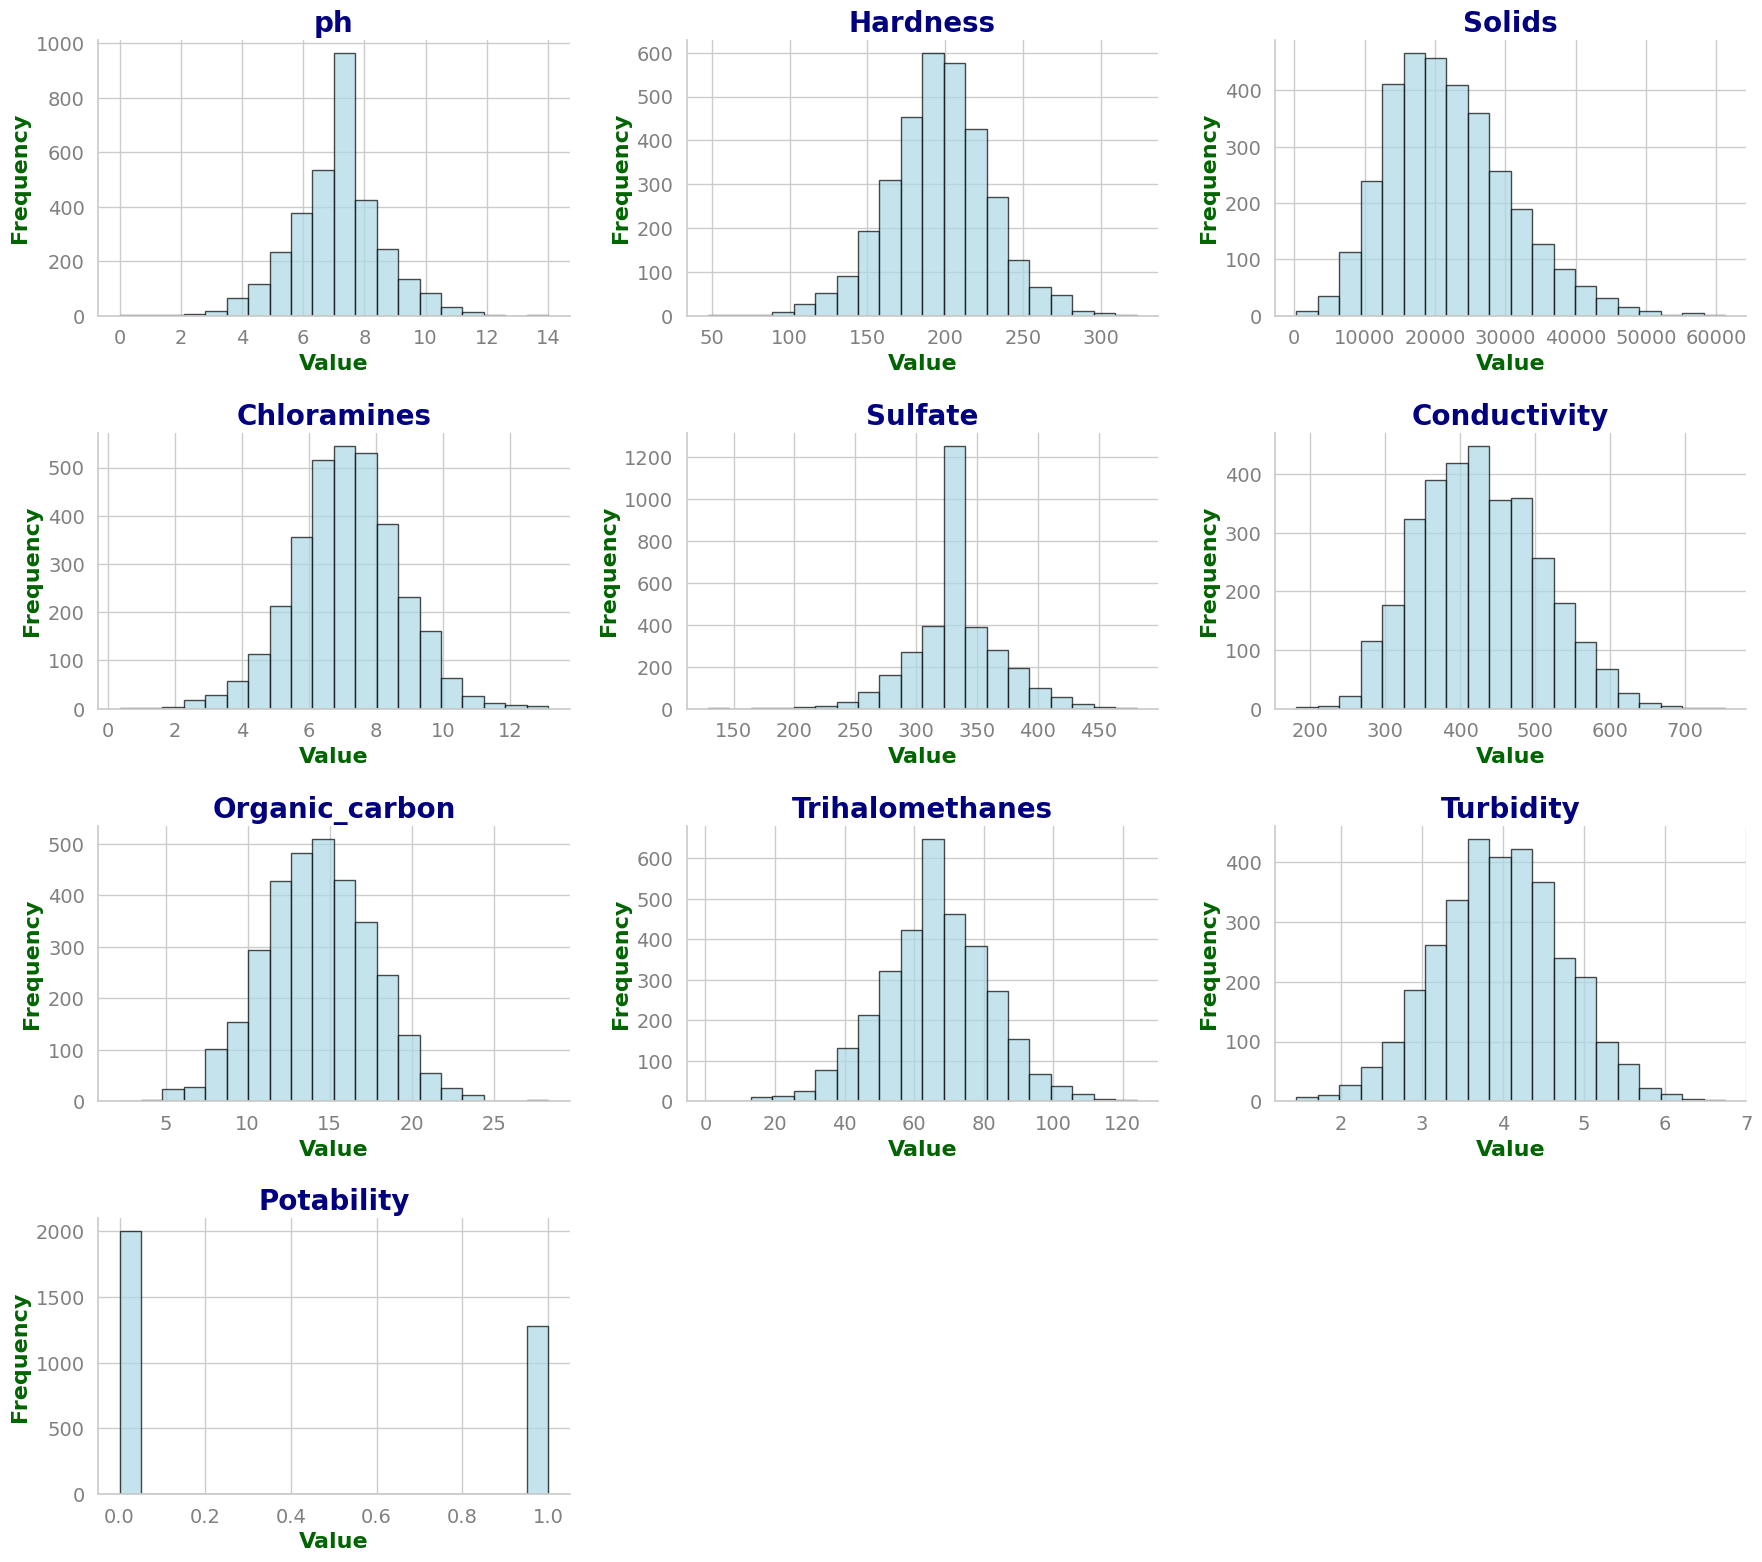

In [152]:
def plot_histograms(data):
    """
    Plot histograms of features to view data distribution.

    Parameters:
    - data (DataFrame): Input data
    """
    # Set style
    sns.set(style='whitegrid', font_scale=1.6)

    # Calculate number of rows and columns for subplots
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Ensure at least 3 columns per row

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 4 * num_rows))

    # Flatten axes for easy iteration
    ax_flat = axes.flatten()

    # Plot histograms for each feature
    for i, col in enumerate(data.columns):
        ax = ax_flat[i]
        ax.hist(data[col], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
        ax.set_title(col, fontsize=20, fontweight='bold', color='navy')
        ax.set_xlabel('Value', fontsize=16, fontweight='bold', color='darkgreen')
        ax.set_ylabel('Frequency', fontsize=16, fontweight='bold', color='darkgreen')
        ax.tick_params(axis='both', which='major', labelsize=14, colors='gray')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Hide unused subplots
    for j in range(num_cols, num_rows * 3):
        fig.delaxes(ax_flat[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms(data)

Potability
0    1998
1    1278
Name: count, dtype: int64


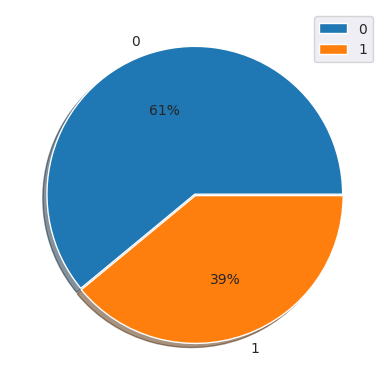

In [118]:
tar = data['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

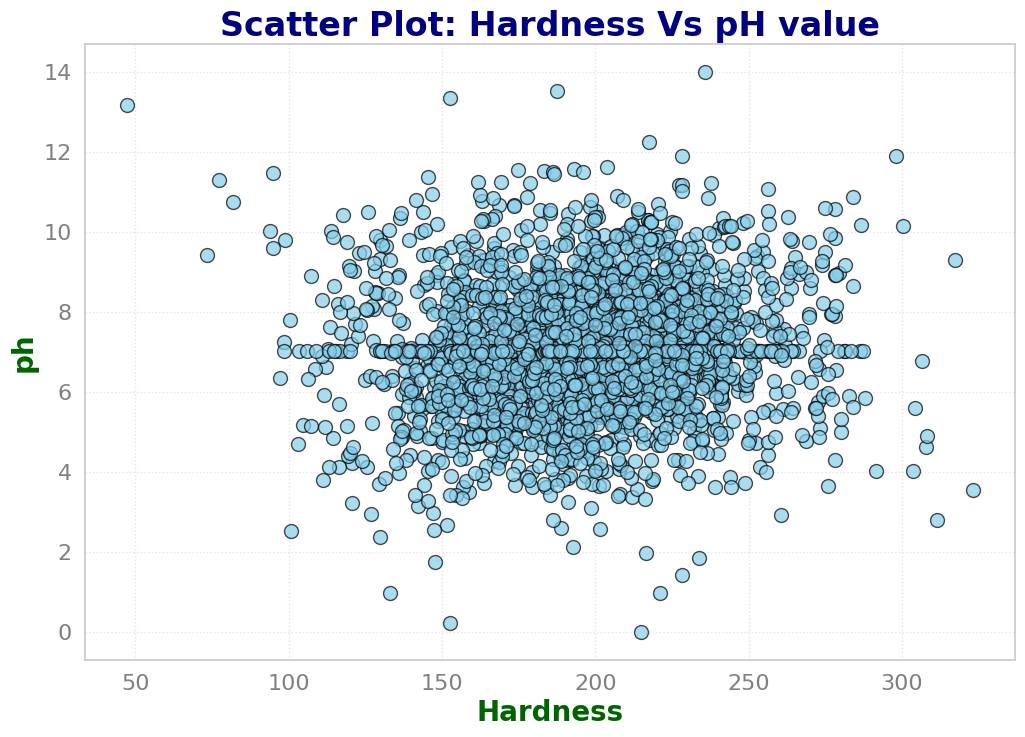

In [150]:
def scatter_plot(data, x_col, y_col, title):
    """
    Plot a scatter plot with a different style and design.

    Parameters:
    - data (DataFrame): Input data
    - x_col (str): Column name for x-axis
    - y_col (str): Column name for y-axis
    - title (str): Title of the plot
    """
    # Set style
    sns.set(style='whitegrid', font_scale=1.5)

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(data[x_col], data[y_col], color='skyblue', edgecolors='black', alpha=0.7, s=100)

    # Set title and labels
    plt.title(title, fontsize=24, fontweight='bold', color='navy')
    plt.xlabel(x_col, fontsize=20, fontweight='bold', color='darkgreen')
    plt.ylabel(y_col, fontsize=20, fontweight='bold', color='darkgreen')

    # Increase tick label font size and color
    plt.xticks(fontsize=16, color='gray')
    plt.yticks(fontsize=16, color='gray')

    # Add grid with dotted lines
    plt.grid(True, linestyle=':', linewidth=1, alpha=0.5)

    plt.show()

# Example usage
scatter_plot(data, 'Hardness', 'ph', 'Scatter Plot: Hardness Vs pH value')

<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ It seeps there is no outlier and noise data in dataframe.</div>

# Correlation Matrix

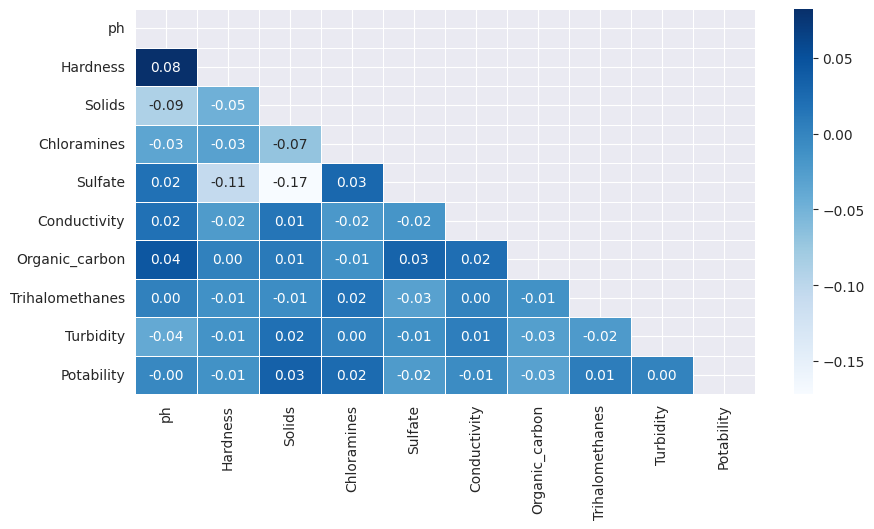

In [119]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

# Data Preprocessing

In [121]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [122]:
print("Number of all samples : ", len(data))

Number of all samples :  3276


In [123]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [124]:
print("For Potability=1")
data[data.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [125]:
print("For Potability=1")
data[data.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [126]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [127]:
data.isna().sum().sum()

0

In [147]:
def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    styled_moments_df = moments_df.style.set_table_styles([
        {'selector': 'th', 'props': [('font-size', '18px'), ('font-weight', 'bold'), ('color', 'white'), ('background-color', 'black'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '16px'), ('text-align', 'center')]},
        {'selector': '', 'props': [('border-collapse', 'collapse'), ('border', '2px solid black')]}
    ])
    display(styled_moments_df)

display_statistical_moments(data)



Statistical Moments:



,Mean,Median,Standard Deviation,Skewness,Kurtosis
ph,7.074194,7.036752,1.470040,0.041266,1.375709
Hardness,196.369496,196.967627,32.879761,-0.039342,0.615772
Solids,22014.092526,20927.833607,8768.570828,0.621634,0.442826
Chloramines,7.122277,7.130299,1.583085,-0.012098,0.589901
Sulfate,333.608364,333.073546,36.143851,-0.027278,1.788673
Conductivity,426.205111,421.884968,80.824064,0.264490,-0.277093
Organic_carbon,14.284970,14.218338,3.308162,0.025533,0.044409
Trihalomethanes,66.407478,66.622485,15.769958,-0.087289,0.407281
Turbidity,3.966786,3.955028,0.780382,-0.007817,-0.062801
Potability,0.390110,0.000000,0.487849,0.450784,-1.797892


In [128]:
# Define X, y
X = data.drop(columns='Potability')
y = data.Potability

In [129]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
ph,0.000000,0.505300,0.105003,1.000000
Hardness,0.000000,0.540231,0.119263,1.000000
Solids,0.000000,0.356173,0.143968,1.000000
Chloramines,0.000000,0.529963,0.123921,1.000000
Sulfate,0.000000,0.581223,0.102672,1.000000
Conductivity,0.000000,0.427940,0.141336,1.000000
Organic_carbon,0.000000,0.463026,0.126750,1.000000
Trihalomethanes,0.000000,0.532763,0.127939,1.000000
Turbidity,0.000000,0.475853,0.147548,1.000000


# Model Making

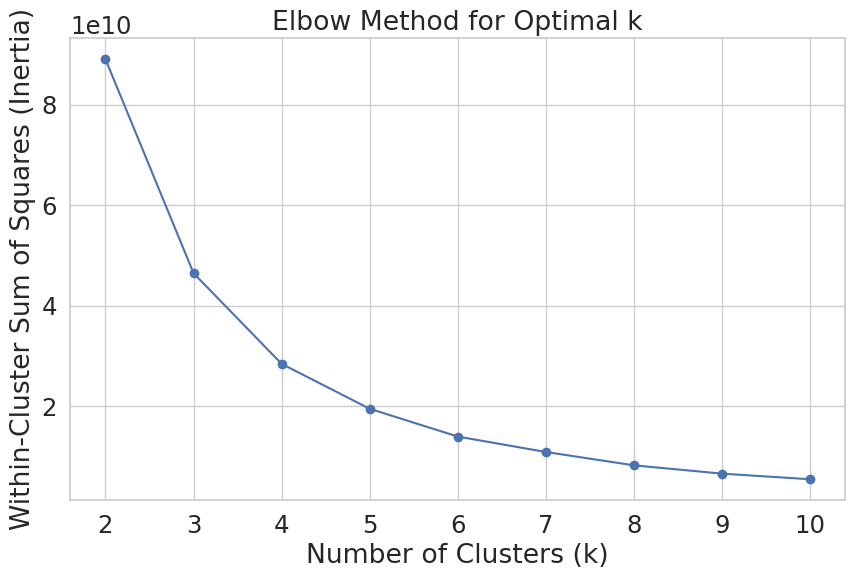

In [154]:
# Extract features for clustering (exclude the 'quality' column)
from sklearn.cluster import KMeans
# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

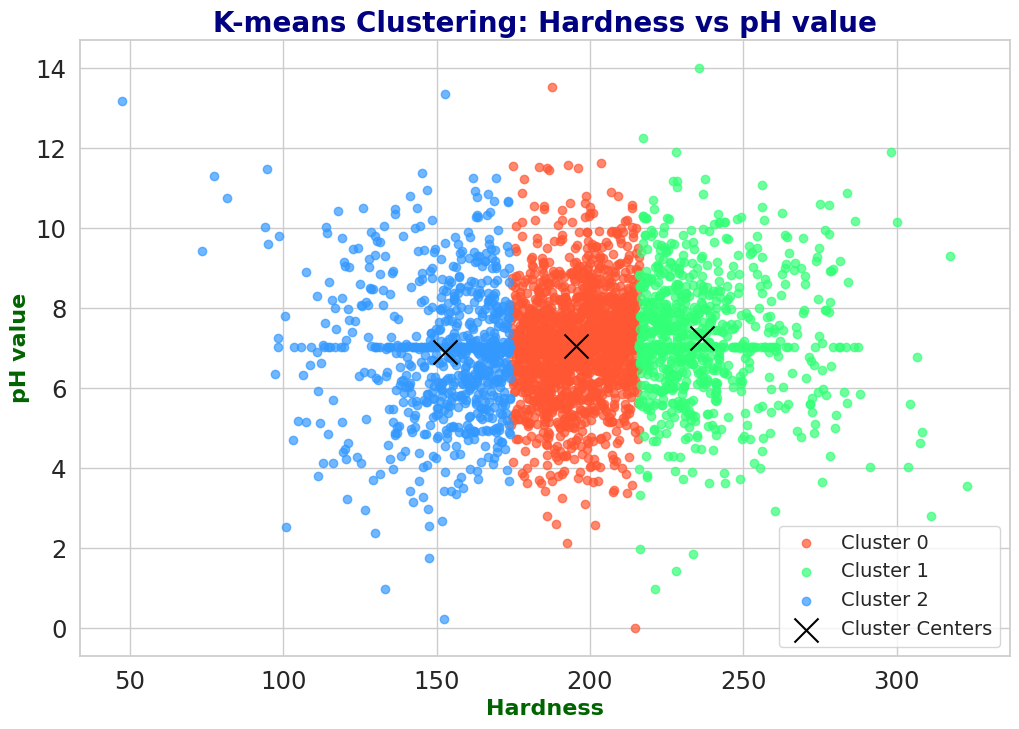

In [155]:
km = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
X['cluster'] = km.fit_predict(X[['Hardness', 'ph']])  # Fit K-means and assign cluster labels

# Plot clusters with cluster centers
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['#FF5733', '#33FF77', '#3399FF', '#FF33EA']

# Plot each cluster using a different color
for cluster_label, color in zip(sorted(X['cluster'].unique()), colors):
    cluster_data = X[X['cluster'] == cluster_label]
    plt.scatter(cluster_data['Hardness'], cluster_data['ph'], label=f'Cluster {cluster_label}', alpha=0.7, color=color)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: Hardness vs pH value', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Hardness', fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel('pH value', fontsize=16, fontweight='bold', color='darkgreen')

# Add legend
plt.legend(fontsize=14)
plt.grid(True)

plt.show()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

## LogisticRegression

## RandomForestClassifier

In [135]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [1000],
    'criterion' : ['log_loss'],
    'max_features' : ['sqrt'],
    'n_jobs' : [-1]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)
print(colored('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 1000, 'n_jobs': -1}


In [136]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print(colored('RandomForestClassifier Score : {}'.format(rf_score), 'green'))

RandomForestClassifier Score : 0.684


In [166]:
pred=pd.DataFrame({"y_test":y_test,'y_pred':y_pred_rf})
pred

,y_test,y_pred
2017,1,0
2533,0,0
589,0,0
482,0,0
2620,0,0
...,...,...
2802,1,0
1120,1,0
601,0,0
2381,1,0


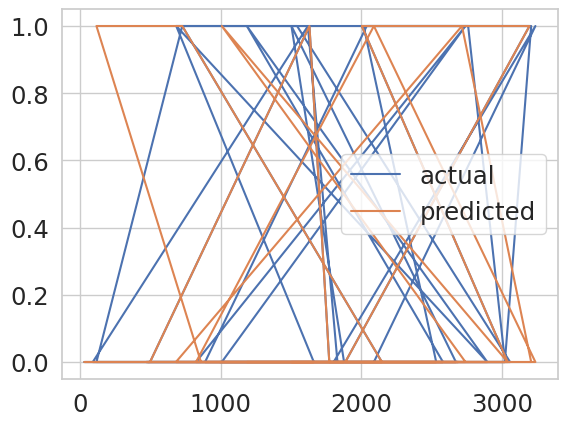

In [167]:
plt.plot(pred[0:50])
plt.legend(['actual','predicted'])
plt.show()

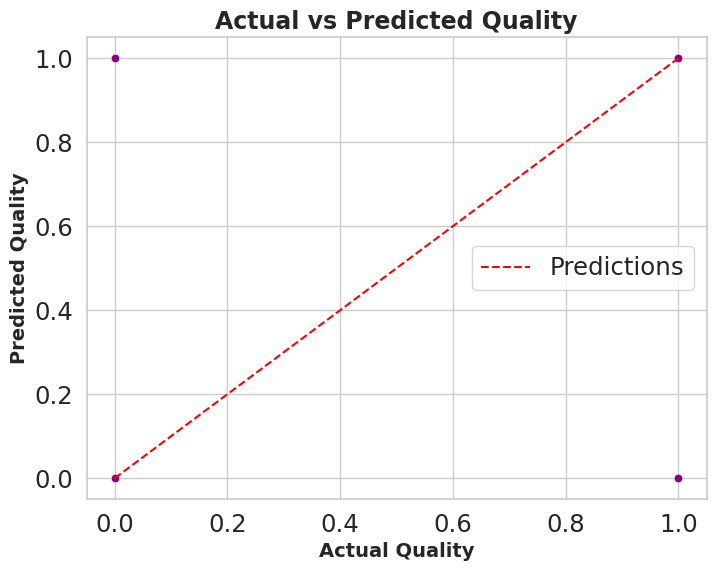

In [168]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='purple', alpha=0.7)
plt.plot(y_pred_rf, y_pred_rf, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Quality', fontsize=17, fontweight='bold')
plt.xlabel('Actual Quality', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Quality', fontsize=14, fontweight='bold')
plt.legend()
plt.show()